# Redistributions

## Setup

In [ ]:
%load_ext autoreload
%autoreload 2
import torch
import tensorcraft as tc
import matplotlib.pyplot as plt
import logging
log = logging.getLogger("tensorcraft")
log.setLevel("INFO")

## AllGather

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([3,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), (2,)), 2)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)


### all axis

In [ ]:
new_dist, max_cost = dist.allGather(tensor_shape, gather_dim=None)
print(new_dist)
print(max_cost)

fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

### Mesh Axis 0

In [ ]:
new_dist, max_cost = dist.allGather(tensor_shape, gather_dim=0)
print(new_dist)
print(max_cost)

fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

### Mesh Axis 1

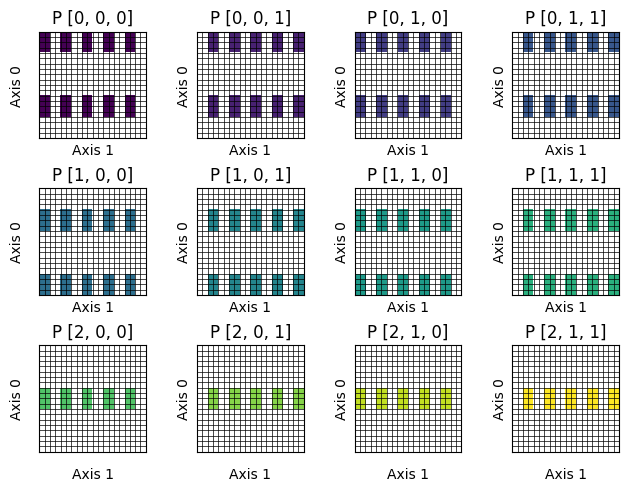

In [ ]:
new_dist, max_cost = dist.allGather(tensor_shape, gather_dim=1)
print(new_dist)
print(max_cost)

fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

### Mesh Axis 2

In [ ]:
new_dist, max_cost = dist.allGather(tensor_shape, gather_dim=2)
print(new_dist)
print(max_cost)

fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

Mesh axis idx: 0
Communication volume: 80
MultiAxisDist(torch.Size([3, 2, 2]), ((0, 1), ()), [2, 2])
tensor(40.)


## Split

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((), ()), 1)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

In [ ]:
new_dist, cost = dist.split(tensor_shape, tensor_axis=0, mesh_dims=2, block_size=2)
print(cost)
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)


In [ ]:
new_new_dist, cost = new_dist.split(tensor_shape, tensor_axis=1, mesh_dims=(0,1), block_size=3)
print(cost)
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, new_new_dist)

In [ ]:
new_new_dist, cost = new_dist.split(tensor_shape, tensor_axis=0, mesh_dims=(0,1), block_size=1)
print(cost)
print(new_new_dist)
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, new_new_dist)

## All2All

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,), ()), 10)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

In [ ]:
new_dist, cost = dist.all2all(tensor_shape, 0, 1)
print(new_dist)
print(cost)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

In [ ]:
tensor_shape = torch.Size([6, 20])
mesh = torch.Size([3,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), (2,)), (1,4))
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

In [ ]:
new_dist, cost = dist.all2all(tensor_shape, 0,1,minor=True)
print(new_dist)
print(cost)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

## Permute

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([3,3])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), ()), 2)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

In [ ]:
new_dist, cost = dist.permute(tensor_shape, [0,1])
print(new_dist)
print(cost)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,), ()), 1)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

## Memory efficient redistributions example

In [ ]:
tensor_shape = torch.Size([8, 8, 8, 4])
mesh = torch.Size([4,2,4])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), (), (), ()), 1)
print(dist)

print("Option 1")
new_dist, cost = dist.all2all(tensor_shape, 0, 1, minor=True)
print(f"Step 0: all2all(0,1) - {new_dist}, Cost: {cost}")
new_dist, cost = new_dist.all2all(tensor_shape, 0, 2)
print(f"Step 1: all2all(0,2) - {new_dist}, Cost: {cost}")

print("Option 2")
new_dist, cost = dist.split(tensor_shape, 3, 2, 1)
print(f"Step 0: split(3,2)  {new_dist}, Cost: {cost}")
new_dist, cost = new_dist.all2all(tensor_shape, 0, 1, minor=True)
print(f"Step 1: all2all(0,1) - {new_dist}, Cost: {cost}")
new_dist, cost = new_dist.all2all(tensor_shape, 0, 2)
print(f"Step 2: all2all(0,2) - {new_dist}, Cost: {cost}")
new_dist, cost = new_dist.allGather(tensor_shape, 2)
print(f"Step 3: allgather(2)  {new_dist}, Cost: {cost}")